<a href="https://colab.research.google.com/github/lapythie/ml/blob/master/HW02_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашка по МО №2

In [0]:
import os
import tarfile
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import *
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
tar = tarfile.open('aclImdb_v1.tar.gz', 'r')
tar.extractall()

--2020-03-02 11:17:59--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  23.2MB/s    in 5.0s    

2020-03-02 11:18:09 (15.9 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
# train labels
for paths, dirs, fnames in os.walk('/content/aclImdb/train/pos'):
  n_of_pos = len(fnames)
for paths, dirs, fnames in os.walk('/content/aclImdb/train/neg'):
  n_of_neg = len(fnames)

pos_label = 1
neg_label = 0
train_labels = [pos_label for i in range (n_of_pos)] + [neg_label for i in range(n_of_neg)]

len(train_labels)

25000

In [0]:
train_data = []
for label in 'pos neg'.split():
  for fname in os.listdir('/content/aclImdb/train/{}'.format(label)):
    with open ('/content/aclImdb/train/{}/{}'.format(label, fname),
               'r', encoding='utf-8') as f:
      train_data.append(f.read())

len(train_data)

25000

In [0]:
# test labels
for paths, dirs, fnames in os.walk('/content/aclImdb/test/pos'):
  n_of_pos = len(fnames)
for paths, dirs, fnames in os.walk('/content/aclImdb/test/neg'):
  n_of_neg = len(fnames)

pos_label = 1
neg_label = 0
test_labels = [pos_label for i in range (n_of_pos)] + [neg_label for i in range(n_of_neg)]

len(test_labels)

25000

In [0]:
test_data = []
for label in 'pos neg'.split():
  for fname in os.listdir('/content/aclImdb/test/{}'.format(label)):
    with open ('/content/aclImdb/test/{}/{}'.format(label, fname),
               'r', encoding='utf-8') as f:
      test_data.append(f.read())

len(test_data)

25000

In [0]:
# count_vect = CountVectorizer()
count_vect = TfidfVectorizer()
X_train_counts = count_vect.fit_transform(train_data) #Learn the vocabulary dictionary and return term-document matrix.
X_train_counts.shape

(25000, 74849)

In [0]:
X_test = count_vect.transform(test_data) # Extract token counts out of raw text documents using the vocabulary fitted with fit 
X_test.shape

(25000, 74849)

##Метод ближайшего соседа [Nearest neighbor classifier]

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, train_labels)
predicted_labels = clf.predict(X_test)

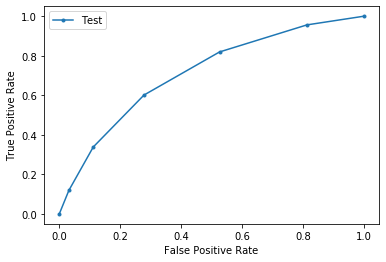

In [0]:
predicted_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(test_labels, predicted_probs[:, 1])

pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [0]:
print(roc_auc_score(test_labels, predicted_probs[:, 1])) # TfidfVectorizer
# CountVectorizer 0.6649082656

0.7120614752


In [0]:
acc = accuracy_score(test_labels, predicted_labels)
micro_f1 = f1_score(test_labels, predicted_labels, average = 'micro')
micro_p = precision_score(test_labels, predicted_labels, average = 'micro')
micro_r = recall_score(test_labels, predicted_labels, average = 'micro')
macro_f1 = f1_score(test_labels, predicted_labels, average = 'macro')
macro_p = precision_score(test_labels, predicted_labels, average = 'macro')
macro_r = recall_score(test_labels, predicted_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6615
micro F1=0.6615, micro P=0.6615, micro R=0.6615
macro F1=0.6603, macro P=0.6639, macro R=0.6615



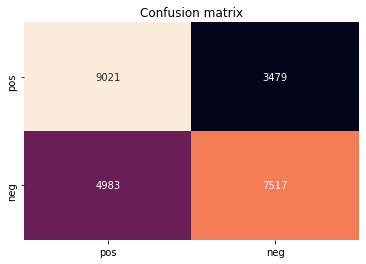

In [0]:
categories = 'pos neg'.split()
sns.heatmap(data=confusion_matrix(test_labels, predicted_labels), 
            annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

## Наивный Байес

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, train_labels)
predicted_labels = clf.predict(X_test)

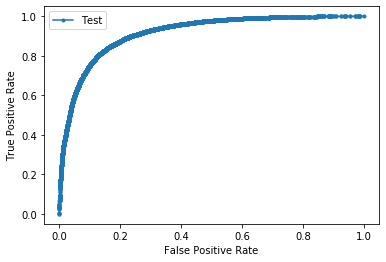

In [0]:
predicted_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(test_labels, predicted_probs[:, 1])

pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [0]:
print(roc_auc_score(test_labels, predicted_probs[:, 1]))

0.9158317056


In [0]:
acc = accuracy_score(test_labels, predicted_labels)
micro_f1 = f1_score(test_labels, predicted_labels, average = 'micro')
micro_p = precision_score(test_labels, predicted_labels, average = 'micro')
micro_r = recall_score(test_labels, predicted_labels, average = 'micro')
macro_f1 = f1_score(test_labels, predicted_labels, average = 'macro')
macro_p = precision_score(test_labels, predicted_labels, average = 'macro')
macro_r = recall_score(test_labels, predicted_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8296
micro F1=0.8296, micro P=0.8296, micro R=0.8296
macro F1=0.8290, macro P=0.8343, macro R=0.8296



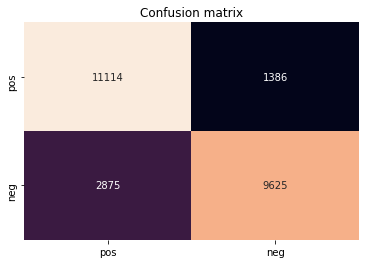

In [0]:
categories = 'pos neg'.split()
sns.heatmap(data=confusion_matrix(test_labels, predicted_labels), 
            annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

## Метод опорных векторов [Support vector machine, SVM] (no ROC-curve)

In [0]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_counts, train_labels)
predicted_labels = clf.predict(X_test)

In [0]:
acc = accuracy_score(test_labels, predicted_labels)
micro_f1 = f1_score(test_labels, predicted_labels, average = 'micro')
micro_p = precision_score(test_labels, predicted_labels, average = 'micro')
micro_r = recall_score(test_labels, predicted_labels, average = 'micro')
macro_f1 = f1_score(test_labels, predicted_labels, average = 'macro')
macro_p = precision_score(test_labels, predicted_labels, average = 'macro')
macro_r = recall_score(test_labels, predicted_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8772
micro F1=0.8772, micro P=0.8772, micro R=0.8772
macro F1=0.8772, macro P=0.8774, macro R=0.8772



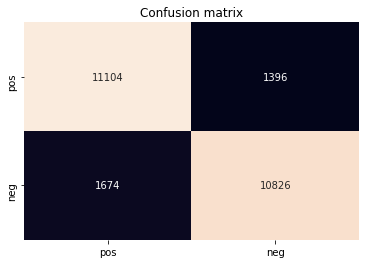

In [0]:
categories = 'pos neg'.split()
sns.heatmap(data=confusion_matrix(test_labels, predicted_labels), 
            annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

##Деревья решений

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_counts, train_labels)
predicted_labels = clf.predict(X_test)

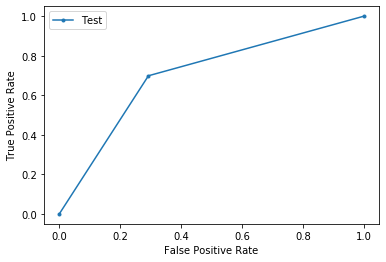

In [0]:
predicted_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(test_labels, predicted_probs[:, 1])

pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [0]:
print(roc_auc_score(test_labels, predicted_probs[:, 1]))


0.7029999999999998


In [0]:
acc = accuracy_score(test_labels, predicted_labels)
micro_f1 = f1_score(test_labels, predicted_labels, average = 'micro')
micro_p = precision_score(test_labels, predicted_labels, average = 'micro')
micro_r = recall_score(test_labels, predicted_labels, average = 'micro')
macro_f1 = f1_score(test_labels, predicted_labels, average = 'macro')
macro_p = precision_score(test_labels, predicted_labels, average = 'macro')
macro_r = recall_score(test_labels, predicted_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7030
micro F1=0.7030, micro P=0.7030, micro R=0.7030
macro F1=0.7030, macro P=0.7030, macro R=0.7030



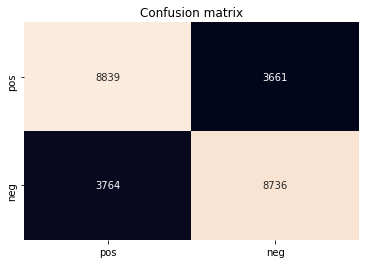

In [0]:
categories = 'pos neg'.split()
sns.heatmap(data=confusion_matrix(test_labels, predicted_labels), 
            annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

##Регрессия (лучшая)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts, train_labels)
predicted_labels = clf.predict(X_test)

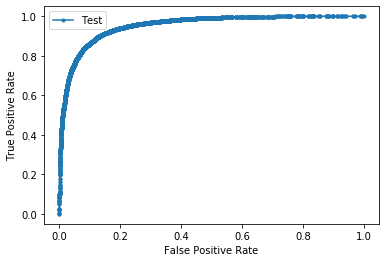

In [0]:
predicted_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(test_labels, predicted_probs[:, 1])

pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [0]:
print(roc_auc_score(test_labels, predicted_probs[:, 1]))

0.9525368896


In [0]:
acc = accuracy_score(test_labels, predicted_labels)
micro_f1 = f1_score(test_labels, predicted_labels, average = 'micro')
micro_p = precision_score(test_labels, predicted_labels, average = 'micro')
micro_r = recall_score(test_labels, predicted_labels, average = 'micro')
macro_f1 = f1_score(test_labels, predicted_labels, average = 'macro')
macro_p = precision_score(test_labels, predicted_labels, average = 'macro')
macro_r = recall_score(test_labels, predicted_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8832
micro F1=0.8832, micro P=0.8832, micro R=0.8832
macro F1=0.8832, macro P=0.8832, macro R=0.8832



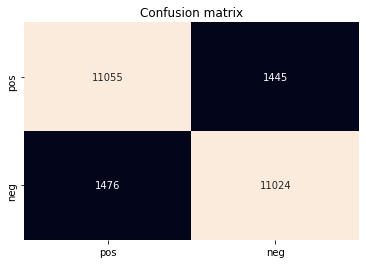

In [0]:
categories = 'pos neg'.split()
sns.heatmap(data=confusion_matrix(test_labels, predicted_labels), 
            annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

##Свои функции для расчёта метрик

In [0]:
def get_count(y_true, y_pred, count):
  '''count: str, 'tp' or 'tn' or 'fp' or 'fn' '''
  lr_test_df = pd.DataFrame({'y_true':y_true,
                           'y_pred':y_pred})
  if count == 'tp':
    count = len(lr_test_df[(lr_test_df.y_true == 1) & (lr_test_df.y_pred == 1)])
  if count == 'tn':
    count = len(lr_test_df[(lr_test_df.y_true == 0) & (lr_test_df.y_pred == 0)])
  if count == 'fp':
    count = len(lr_test_df[(lr_test_df.y_true == 0) & (lr_test_df.y_pred == 1)])
  if count == 'fn':
    count = len(lr_test_df[(lr_test_df.y_true == 1) & (lr_test_df.y_pred == 0)])
  return count

def get_metric(y_true, y_pred, metric):
  '''metric: str, 'precision' or 'recall' or 'fscore' '''
  tp = get_count(y_true, y_pred, 'tp')
  tn = get_count(y_true, y_pred, 'tn')
  fp = get_count(y_true, y_pred, 'fp')
  fn = get_count(y_true, y_pred, 'fn')
  if metric == 'precision':
    metric = tp/(tp+fp)
  if metric == 'recall':
    metric = tp/(tp+fn)
  if metric == 'fscore':
    metric = 2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))
  return metric

In [0]:
for count in 'tp tn fp fn'.split():
  print ('{} = {}'.format(count, get_count(test_labels, predicted_labels, count)))
for metric in 'precision recall fscore'.split():
  print ('{} = {}'.format(metric, get_metric(test_labels, predicted_labels, metric)))

tp = 11024
tn = 11055
fp = 1445
fn = 1476
precision = 0.8841125992461304
recall = 0.88192
fscore = 0.8830149385237694


#15 самых негативных и самых позитивных рецензий по мнению модели

In [0]:
lr_predicted_probs_df = pd.DataFrame({'review':test_data, 
                                      'neg_prob':predicted_probs[:, 0], 
                                      'pos_prob':predicted_probs[:, 1]})

In [0]:
# 15 most positive reviews
for value in lr_predicted_probs_df.nlargest(15, 'pos_prob')['review'].values:
  print (value)

What a wonderful film, filled with eccentric, unique characters who are wonderfully realized by a great ensemble cast. The director also did a great job keeping the story held together, getting those wonderful performances (on not messing with them) and using music (and what wonderful music it is) to great effect. S. Epatha in the lead role is great. I had always heard what a brilliant stage actor she is, and although I have enjoyed her on Law and Order, this really shows what she can do with a filled out, complex role. Macy Gray is terrific, Mos Def, as usual, wonderful. Lou Gossett, great. Jimmy Smits, terrific, and doesn't try to pull focus because he's a star. A true piece of ensemble acting. <br /><br />Rent it, enjoy it, groove to it, and treasure it. Something special.
I think this is one of the best tamil movies i've seen in a while. i love the fact that it doesn't revolve around a guy and girl falling in love and they made the movie brilliantly. The cast did a great job and i 

In [0]:
# 15 most negative reviews
for value in lr_predicted_probs_df.nlargest(15, 'neg_prob')['review'].values:
  print (value)

This was truly horrible. Bad acting, bad writing, bad effects, bad scripting, bad camera shots, bad filming, bad characters, bad music, bad editing, bad casting, bad storyline, bad ... well, you get the idea. It was just, just ... what's the word? Oh yeah ... BAD!
As you can tell from the other comments, this movie is just about the WORST film ever made. Let me see how many different words I can use to describe it: Boring, Unbearable, Laughable, Lousy, Stupid, Horrible.....<br /><br />I could go on with such descriptions but you probably get the point.<br /><br />I would have given this a 0, if possible--bad acting, bad directing, bad production, bad plot.<br /><br />This was made in 2001 and it looks more like 1965. Very low budget, boring plot, horrible acting, really bad special effects, etc...<br /><br />I rarely ever see a Sci-Fi film I absolutely think is this bad. I mean this is pure garbage. It has nothing going for it either. As far as a "B-movie" this is the very bottom of th

#Trash

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())]) 
text_clf 

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(2, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
clf=text_clf
clf.fit(train_data, train_labels)
predicted_labels = clf.predict(test_data)

In [0]:
predicted_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(test_labels, predicted_probs[:, 1])

pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [0]:
print(roc_auc_score(test_labels, predicted_probs[:, 1]))

0.7028


In [0]:
acc = accuracy_score(test_labels, predicted_labels)
micro_f1 = f1_score(test_labels, predicted_labels, average = 'micro')
micro_p = precision_score(test_labels, predicted_labels, average = 'micro')
micro_r = recall_score(test_labels, predicted_labels, average = 'micro')
macro_f1 = f1_score(test_labels, predicted_labels, average = 'macro')
macro_p = precision_score(test_labels, predicted_labels, average = 'macro')
macro_r = recall_score(test_labels, predicted_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8820
micro F1=0.8820, micro P=0.8820, micro R=0.8820
macro F1=0.8818, macro P=0.8841, macro R=0.8820



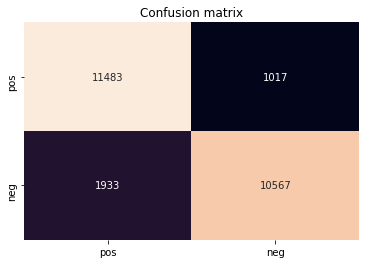

In [0]:
categories = 'pos neg'.split()
sns.heatmap(data=confusion_matrix(test_labels, predicted_labels), 
            annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()